### Business Scenario
A retail company spends money on advertising to increase product sales.
The marketing team believes that TV advertising spend has a strong impact on sales.
The management wants answers to the following question:
“If we increase our TV advertising budget, how will it affect sales?”

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
print(df.isnull().sum())
df['TV']=df['TV'].fillna(df['TV'].mean())
df['Radio']=df['Radio'].fillna(df['Radio'].mean())
df['Newspaper']=df['Newspaper'].fillna(df['Newspaper'].mean())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
x=df[['TV']].values
y=df['Sales'].values
x,y

(array([[230.1],
        [ 44.5],
        [ 17.2],
        [151.5],
        [180.8],
        [  8.7],
        [ 57.5],
        [120.2],
        [  8.6],
        [199.8],
        [ 66.1],
        [214.7],
        [ 23.8],
        [ 97.5],
        [204.1],
        [195.4],
        [ 67.8],
        [281.4],
        [ 69.2],
        [147.3],
        [218.4],
        [237.4],
        [ 13.2],
        [228.3],
        [ 62.3],
        [262.9],
        [142.9],
        [240.1],
        [248.8],
        [ 70.6],
        [292.9],
        [112.9],
        [ 97.2],
        [265.6],
        [ 95.7],
        [290.7],
        [266.9],
        [ 74.7],
        [ 43.1],
        [228. ],
        [202.5],
        [177. ],
        [293.6],
        [206.9],
        [ 25.1],
        [175.1],
        [ 89.7],
        [239.9],
        [227.2],
        [ 66.9],
        [199.8],
        [100.4],
        [216.4],
        [182.6],
        [262.7],
        [198.9],
        [  7.3],
        [136.2],
        [210.8

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [10]:
data=np.array([[150]])
pre=model.predict(data)
print(f'Predicted Sales for TV advertising budget of 150: {pre[0]}')

Predicted Sales for TV advertising budget of 150: 15.329550017961328


In [11]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6.101072906773964
R^2 Score: 0.802561303423698


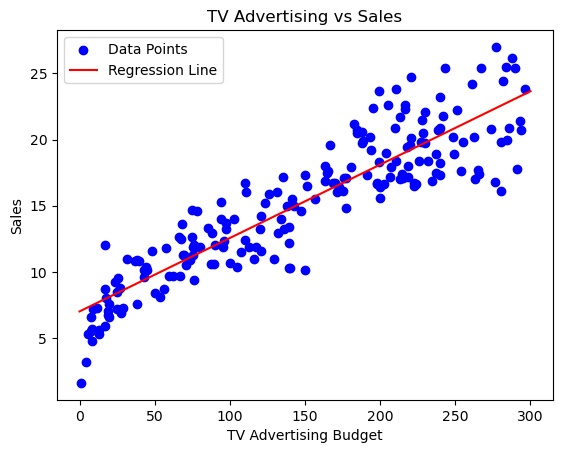

In [13]:
x_line=np.linspace(0,300,100).reshape(-1,1)
y_line=model.predict(x_line)
plt.scatter(x,y,color='blue',label='Data Points')
plt.plot(x_line,y_line,color='red',label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()